In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

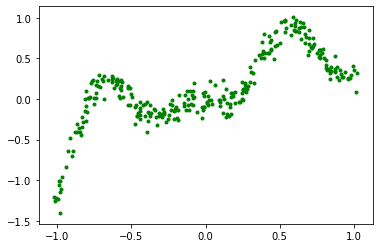

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [3]:
# ## Binary labeled data

# x = np.linspace(0,1,300)
# y= np.where(x<0.25, -0.5, 1)

# noise = np.random.normal(0,0.02, x.shape)

# x = x + noise
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise

# indx = np.argsort(x)
# x = x[indx]
# y = y[indx]

# x = x*2
# x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)

# %matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
# plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [4]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])
    
    dy = yout - yy
    
    if epoch%10 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dx.reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.20838318912542053


10 Error =  0.16345660778911836


20 Error =  0.13737739560215867


30 Error =  0.11694018817229401


40 Error =  0.10289704951678724


50 Error =  0.0975497043562778


60 Error =  0.11538440785128129


70 Error =  0.1411671696387097


80 Error =  0.18515872692805535


90 Error =  0.19330235684142755


100 Error =  0.19221030854089804


110 Error =  0.19220500120798123


120 Error =  0.1921548011763507


130 Error =  0.19215001610952023


140 Error =  0.1921514050488245


150 Error =  0.19215005229373588


160 Error =  0.19214933687840946


170 Error =  0.19214928325293087


180 Error =  0.19214930120977777


190 Error =  0.19214929051153687


200 Error =  0.19214928009882778


210 Error =  0.19214927680152552


220 Error =  0.19214927641094176


230 Error =  0.1921492764596912


240 Error =  0.19214927646064114


250 Error =  0.19214927643662952


260 Error =  0.1921492764201964


270 Error =  0.19214927641340576


280 Error =  0.19214927641132615


29

TclError: invalid command name "pyimage10"

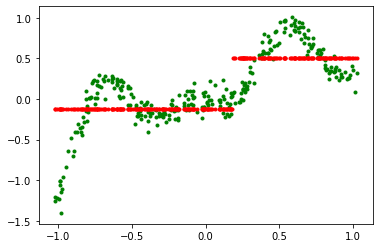

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [7]:
error, linear.weights, linear.bias

(0.09501694173184803, array([[2.79466002]]), array([-0.51417637]))

In [8]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(121, 179)

In [9]:
'''
This problem needs different type of gradient
* We can move the decision boundary using gaussian based optimization.
* The decision boundary looks at the two sides of it (locally)
* The error is calculated as the resulting shift that 
'''

'\nThis problem needs different type of gradient\n* We can move the decision boundary using gaussian based optimization.\n* The decision boundary looks at the two sides of it (locally)\n* The error is calculated as the resulting shift that \n'

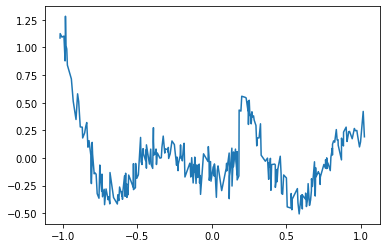

In [10]:
plt.plot(x,dy)

In [11]:
gaussian = tnn.Gaussian()

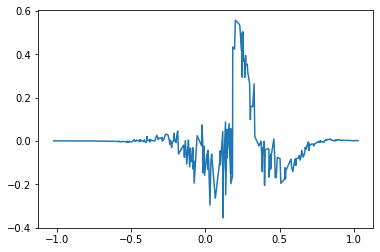

In [12]:
plt.plot(x, gaussian.forward(lout)*dy)

In [13]:
(gaussian.forward(lout)*dy).mean()

0.0010871425259725246

## Sigmoid based,, it has gaussian gradient scaling

In [21]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [22]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(sigmoid.backward(dy))#/0.25)
    dx = linear.backward(dy)#/0.25)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1

#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])

    dy = yout - yy
    dx = linear.backward(dy)
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
#         ax.scatter(x, dx.reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.20838318912542053


100 Error =  0.12666229284893443


200 Error =  0.12544859223988322


300 Error =  0.12292336375437855


400 Error =  0.12214464196317332


500 Error =  0.12113221012247652


600 Error =  0.12116032357436027


700 Error =  0.12116031731285565


800 Error =  0.12016184571897282


900 Error =  0.12016142377621747


1000 Error =  0.12016142376424847


1100 Error =  0.12016142376424756


1200 Error =  0.12016142376424757


1300 Error =  0.12016142376424756


1400 Error =  0.12016142376424756


1500 Error =  0.12016142376424756


1600 Error =  0.12016142376424756


1700 Error =  0.12016142376424756


1800 Error =  0.12016142376424756


1900 Error =  0.1194004745456931


2000 Error =  0.11940104344758476


2100 Error =  0.11814124605844906


2200 Error =  0.11814124604505025


2300 Error =  0.11814124604505016


2400 Error =  0.11814124604505016


2500 Error =  0.11814124604505016


2600 Error =  0.11722886307750374


2700 Error =  0.1172288447176258


2800 E



22500 Error =  0.1149254370068806


22600 Error =  0.1149254354968936


22700 Error =  0.11492543549684948


22800 Error =  0.11492543747967399


22900 Error =  0.11492543550433872


23000 Error =  0.11492543549685455


23100 Error =  0.11492543587114028


23200 Error =  0.11492543549690024


23300 Error =  0.11492543549684951


23400 Error =  0.11492544740997195


23500 Error =  0.11492543559192094


23600 Error =  0.11492543552848922


23700 Error =  0.11492543554772187


23800 Error =  0.11492543549685469


23900 Error =  0.11492543549684951


24000 Error =  0.11492543557621654


24100 Error =  0.11492543570747941


24200 Error =  0.1149261305744643


24300 Error =  0.11492543551839345


24400 Error =  0.11492543549685012


24500 Error =  0.11492543549684948


24600 Error =  0.11492543554817371


24700 Error =  0.11492543568057405


24800 Error =  0.11492549260230447


24900 Error =  0.11492543549689192


25000 Error =  0.11492543549684953


25100 Error =  0.11492543549684948


25



44800 Error =  0.11492543549684951


44900 Error =  0.11492550664582396


45000 Error =  0.11492543550192726


45100 Error =  0.11492543549684968


45200 Error =  0.11492543549684948


45300 Error =  0.11492543549684948


45400 Error =  0.11492543549684953


45500 Error =  0.11492546899645674


45600 Error =  0.11492543549694138


45700 Error =  0.11492543549684953


45800 Error =  0.11492543549684951


45900 Error =  0.11492543549684951


46000 Error =  0.11492543549737017


46100 Error =  0.11492546671776424


46200 Error =  0.11492543549786154


46300 Error =  0.11492543549684953


46400 Error =  0.11492543549684948


46500 Error =  0.11492543549684951


46600 Error =  0.11492587101639534


46700 Error =  0.11492557475286169


46800 Error =  0.11492543549741877


46900 Error =  0.11492543549684958


47000 Error =  0.11492543549684948


47100 Error =  0.11492543549684948


47200 Error =  0.11492543573650409


47300 Error =  0.11492545058946076


47400 Error =  0.11492543551816771





67000 Error =  0.11492543549688392


67100 Error =  0.11492543549684951


67200 Error =  0.11492543549684948


67300 Error =  0.11492544825117203


67400 Error =  0.11492543555815045


67500 Error =  0.11492543612402722


67600 Error =  0.11492543549686275


67700 Error =  0.11492543549684948


67800 Error =  0.11492543549684948


67900 Error =  0.11492685268801035


68000 Error =  0.1149254355457069


68100 Error =  0.11492543552789568


68200 Error =  0.11492543549684972


68300 Error =  0.11492543549684948


68400 Error =  0.11492543549684948


68500 Error =  0.11492543550352614


68600 Error =  0.11492567880766463


68700 Error =  0.11492543549686829


68800 Error =  0.11492543549685096


68900 Error =  0.11492543549684948


69000 Error =  0.11492543549684948


69100 Error =  0.11492543549690247


69200 Error =  0.11492558756321258


69300 Error =  0.11492543549778308


69400 Error =  0.11492543549684975


69500 Error =  0.11492543549684951


69600 Error =  0.11492543549684948




/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/NN_Func_Approx/Soft_Decision_Tree/mylibrary/nnlib.py:142: RuntimeWarning: overflow encountered in exp
  self.out = 1 / (1 + np.exp(-x))


69900 Error =  0.11492543550093158


70000 Error =  0.11492543549684972


70100 Error =  0.11492543549684951


70200 Error =  0.11492543549684948


70300 Error =  0.11492543549685294


70400 Error =  0.11492544005383716


70500 Error =  0.11492543549767868


TclError: invalid command name "pyimage57"

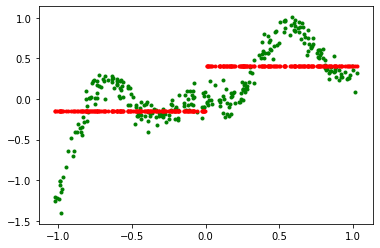

In [23]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [11]:
linear.weights, linear.bias

(array([[6.79878104]]), array([-1.27071566]))

## Greedy best split

In [12]:
splits = np.linspace(-1, 1, num=5000)

In [13]:
def measure_split(split):
    mask = xx<split
    y1 = yy[mask]
    y2 = yy[~mask]
    
    out = np.empty_like(yy)
    out[mask] = y1.mean()
    out[~mask] = y2.mean()
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [14]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

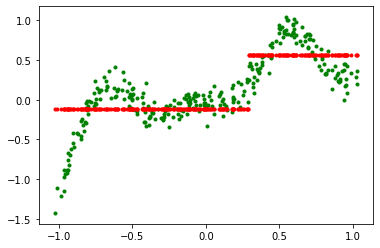

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')

In [16]:
best_error

0.0802760611912184

## Sigmoid based - Hard and soft combine

In [ ]:
import copy

In [ ]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    lout = dy0*c0*mask0 + dy1*c1*mask1
    dx = linear.backward(lout)
    
#     linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

#     yy_disc = copy.deepcopy(yout)
    
    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))   
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

In [ ]:
dy

### Stochastic sigmoid training

In [ ]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    mask0 = lout>0
    mask1 = ~mask0    
    yout = c0*mask0 + c1*mask1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))
    lout = np.array([np.random.binomial(1, p) for p in lout])
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

In [ ]:
lout